In [231]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


In [232]:
PATH = "../input/house-rent-prediction-dataset"
dataset = pd.read_csv(PATH+"/House_Rent_Dataset.csv")
df = pd.DataFrame(dataset)

In [233]:
info = """
BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats."""

In [259]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [260]:
df_dropped = df.drop(labels=['Posted On','Area Locality', 'Point of Contact'], axis=1)
df_dropped.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1


In [261]:
def translate_floors_to_nums(floor_desc):
    # replace words with numbers and prepare for splitting
    res = floor_desc.replace('Ground','0')
    res = res.replace('Upper Basement','-1')
    res = res.replace('Lower Basement','-2')
    res = res.replace(' out of ', ':')
    
    res = res.split(':')
    
    # if there's only one numerical value, then assume that's the second value as well...
    if len(res)==1:
        return int(res[0]), int(res[0])
    
    return int(res[0]), int(res[1])

In [262]:
# split the "Floor" col into two numerical columns
ls = df_dropped['Floor'].to_list()
res = map(translate_floors_to_nums,ls)
arr = np.array(list(res))
floor_col = arr[:,0]
max_floor_col = arr[:,1]


In [263]:
# remove the former 'Floor' and add the new cols
df_cleaned = df_dropped.drop('Floor',axis=1)
df_cleaned['Floor'] = floor_col
df_cleaned['Max_Floor'] = max_floor_col
df_cleaned.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Floor,Max_Floor
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,1,2


In [264]:
# Make sure there are only numerical values that make sense
print("unique values of floor col:", sorted(df_cleaned['Floor'].unique()))
print("unique values of max_floor col:",sorted(df_cleaned['Max_Floor'].unique()))

# [-2,100] for the first value, and [0,100] for the second one. With more probability of higher numbers on the second one

unique values of floor col: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 53, 60, 65, 76]
unique values of max_floor col: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50, 51, 52, 54, 55, 58, 59, 60, 62, 66, 68, 71, 75, 76, 77, 78, 81, 85, 89]


In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 720x432 with 0 Axes>

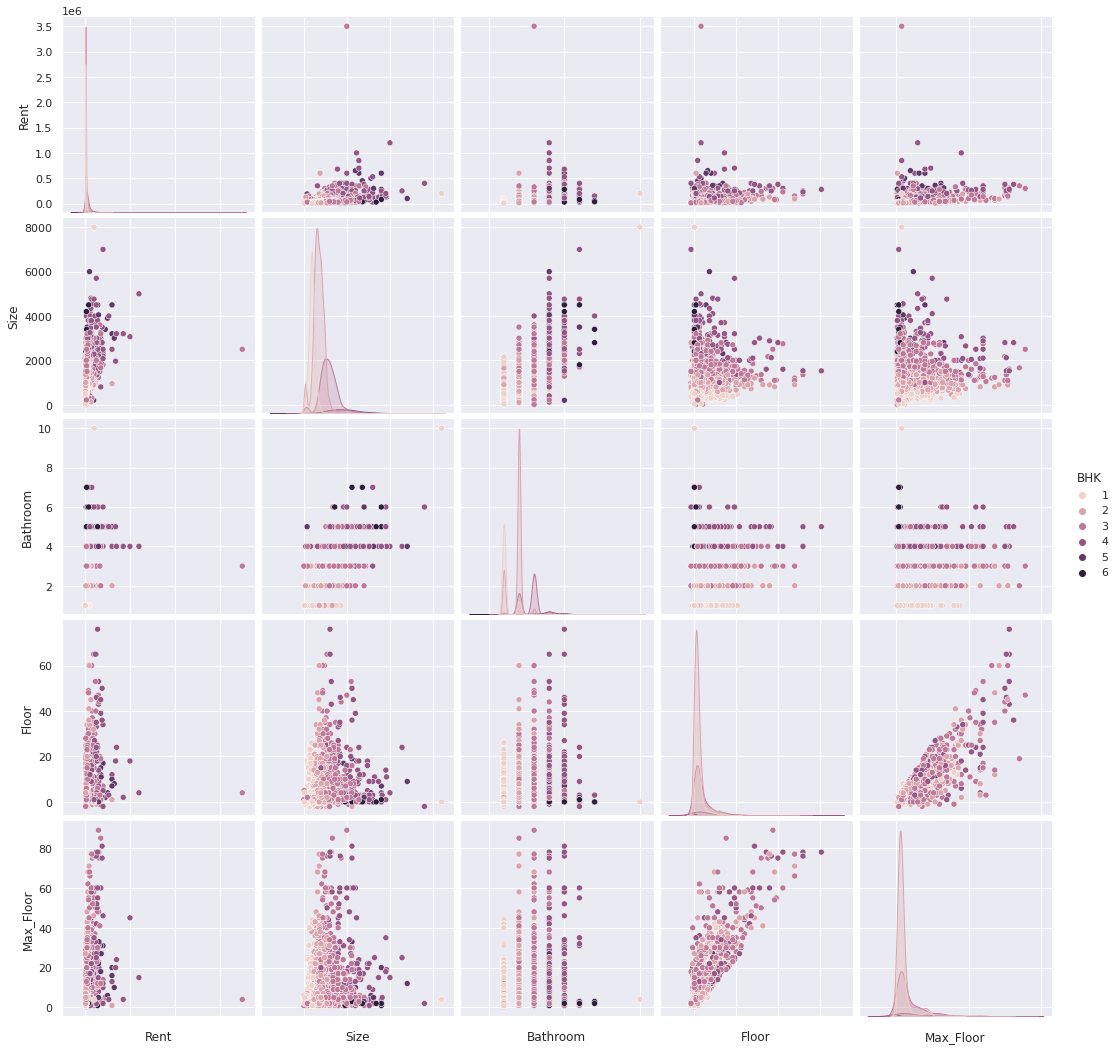

In [270]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(df_cleaned[df_cleaned.columns],hue='BHK',height=3)
g.set(xticklabels=[])

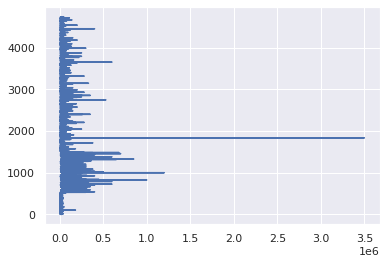

In [271]:
# there's no clear linear relationship between the price column and any other
# but there's a certain data point messing up the overall statistic
sns.set()
plt.plot(df_cleaned['Rent'], range(len(df_cleaned['Rent'])))

In [272]:
#it's around the 2000th element, search and destroy...
max_rent = df_cleaned['Rent'].max()
idx = df_cleaned[df_cleaned['Rent'] == max_rent].index[0]
print(idx)

df_cleaned = df_cleaned.drop(index=idx)


1837


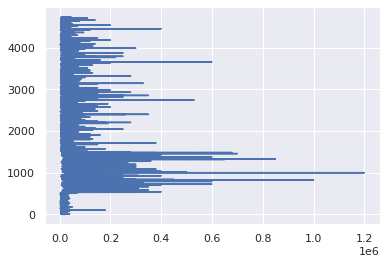

In [273]:
# Check if it's taken care of
sns.set()
plt.plot(df_cleaned['Rent'], range(len(df_cleaned['Rent'])))


<AxesSubplot:>

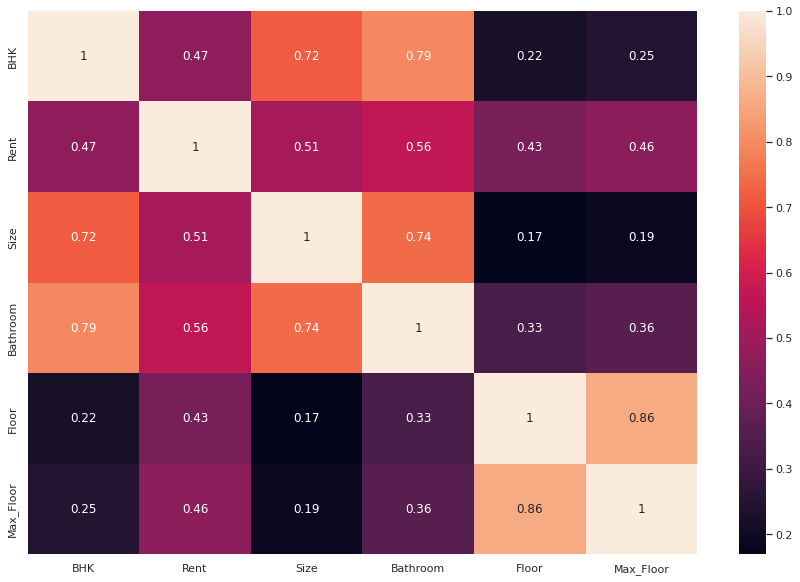

In [274]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cleaned[df_cleaned.columns].corr(),annot=True)

In [246]:
# as expected, BHK and Bathroom cols are corelated, as well as Floor and Max_Floor. Size and Bathroom as well, but nothing is significantly correlated with Rent (our target )

In [277]:
# force numerical values
df_dummies = pd.get_dummies(df_cleaned)
df_dummies.head()

,BHK,Size,Bathroom,Floor,Max_Floor,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,1100,2,0,2,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
1,2,800,1,1,3,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,2,1000,1,1,3,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
3,2,800,1,1,2,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
4,2,850,1,1,2,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0


In [278]:
# split the df into X and Y
Y = df_dummies.pop("Rent").values
X = df_dummies.values



In [300]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import explained_variance_score, confusion_matrix


# train and test split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [301]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [302]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [303]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [344]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05,max_depth=4, random_state=1)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
gbr_score = gbr.score(X_test,y_test)
expl_gbr = explained_variance_score(gbr_pred, y_test)

In [389]:
from xgboost.sklearn import XGBRegressor
xgbr = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=4, random_state=1)
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)
xgbr_score = xgbr.score(X_test,y_test)
expl_xgbr = explained_variance_score(xgbr_pred, y_test)

In [390]:
print("Multiple Linear Regression Model Score is ",round(mlr_score*100))
print("Decision tree  Regression Model Score is ",round(decision_score*100))
print("Random Forest Regression Model Score is ",round(rf_score*100))
print("Gradient Boosting Regression Model Score is ",round(gbr_score*100))
print("Xtreme Gradient Boosting Regression Model Score is ",round(xgbr_score*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression','Gradient Boosting Regression','Xtreme Gradient Boosting Regression'],
                            'Score':[mlr_score,decision_score,rf_score, gbr_score, xgbr_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf, expl_gbr, expl_xgbr]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  47
Decision tree  Regression Model Score is  54
Random Forest Regression Model Score is  72
Gradient Boosting Regression Model Score is  72
Xtreme Gradient Boosting Regression Model Score is  72


,Model,Score,Explained Variance Score
4,Xtreme Gradient Boosting Regression,0.724923,0.428449
3,Gradient Boosting Regression,0.721447,0.412064
2,Random forest Regression,0.716064,0.384501
1,Decision Tree,0.544984,0.068016
0,Multiple Linear Regression,0.474176,-0.631708
